In [1]:
import json
import os
import mimetypes

import pandas as pd

from plot_from_dict import *

In [2]:
%cd ..
%pwd

/home/onyxia/work/ML_research_seminar


'/home/onyxia/work/ML_research_seminar'

# I. Preparation of the data

In [3]:
list_dict = []

path_results = "./model/results/"

with os.scandir(path_results) as entries:

    for entry in entries:

        if entry.is_file() :

          name = entry.name

          if 'json' in mimetypes.guess_type(name)[0] :

            with open(f"{path_results}/{name}", 'r') as file:

              data = json.load(file)

            list_dict.append(data)

In [4]:
path_homophily = "./homophily/homophily_data.csv"

df_homophily = pd.read_csv(path_homophily)
df_homophily['Name_Dataset'] = df_homophily['Name_Dataset'].apply(lambda s : s.upper())
df_homophily.head()

,Name_Dataset,Size_dataset,Nb_class,Nb_features,Seed,Homophily_edge_train,Homophily_edge_test,Homophily_node_train,Homophily_node_test,Homophily_edge_insensitive_train,Homophily_edge_insensitive_test
0,MUTAG,188,2,7,12345,0.721,0.722,0.661,0.662,0.034,0.035
1,ENZYMES,600,6,3,12345,0.667,0.660,0.665,0.664,0.370,0.399
2,PROTEINS,1113,2,3,12345,0.657,0.654,0.652,0.648,0.372,0.367
3,PATTERN,10000,2,3,12345,0.333,0.333,0.333,0.333,0.000,0.000
4,CLUSTER,10000,6,7,12345,0.905,0.905,0.901,0.901,0.009,0.000


In [5]:
for dic in list_dict :
  name_dataset = dic["dataset"]
  dic["homophily"] = df_homophily.loc[df_homophily['Name_Dataset'] == name_dataset, 'Homophily_edge_train'].values[0]

# II. Scatter plot in 3D

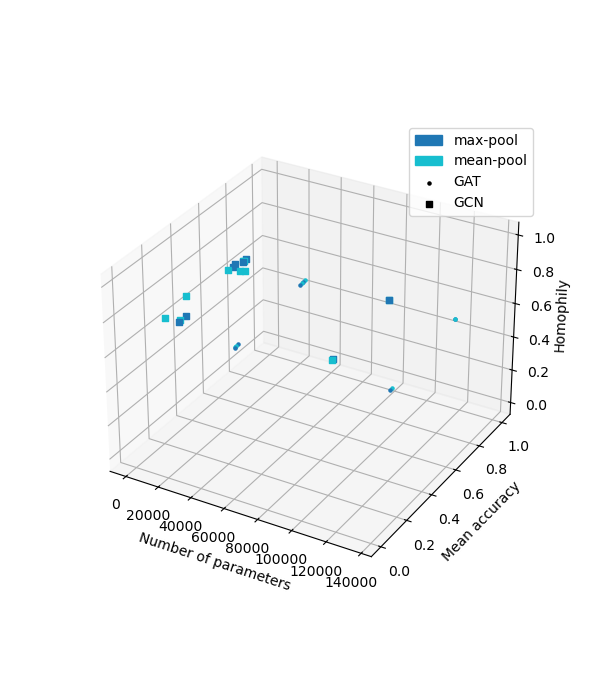

In [6]:
%matplotlib widget
plot_from_dict(list_dict, (6,7))

# III. Pairplot

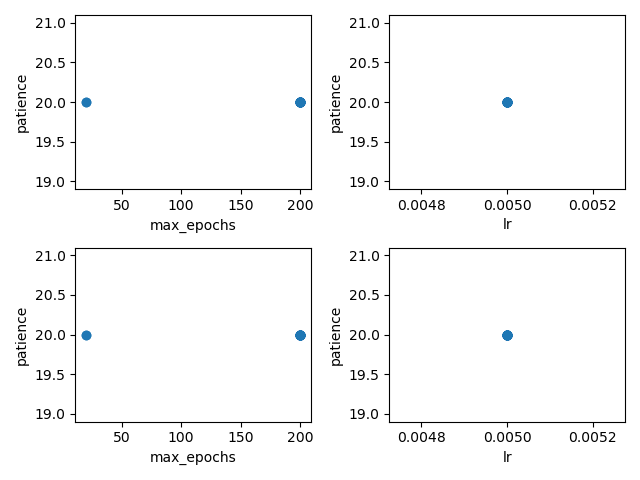

In [8]:
pairplot_from_dict(list_dict, [('max_epochs','patience'),('lr','patience'),('max_epochs','patience'),('lr','patience')], (2,2))

# IV Losses

In [6]:
list_dict[0].keys()

dict_keys(['alpha', 'attention_heads', 'batch_size', 'convolution_layer', 'dataset', 'deterministic_algorithms', 'global_pooling_layer', 'local_pooling_layer', 'lr', 'max_epochs', 'patience', 'split 1', 'split 2', 'split 3', 'split 4', 'split 5', 'split 6', 'split 7', 'split 8', 'split 9', 'split 10', 'nb_parameters', 'mean_accuracy', 'std_accuracy', 'homophily'])

In [7]:
plot_losses(list_dict, "train")

In [8]:
plot_losses(list_dict, "val")

In [10]:
plot_acc(list_dict, "train")

In [11]:
plot_acc(list_dict, "val")

In [7]:
plot_acc_and_loss(list_dict, "train")

In [8]:
plot_acc_and_loss(list_dict, "val")

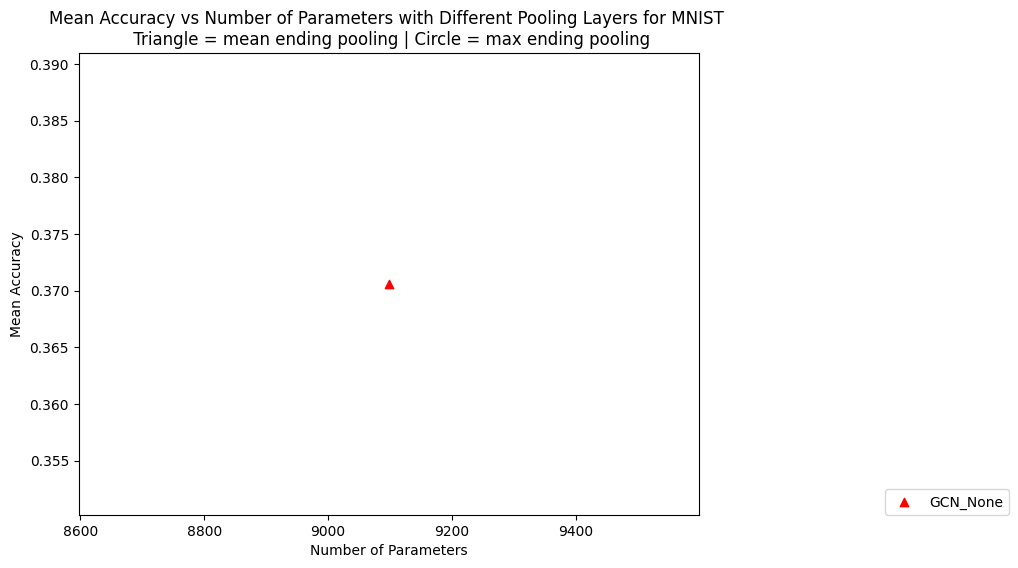

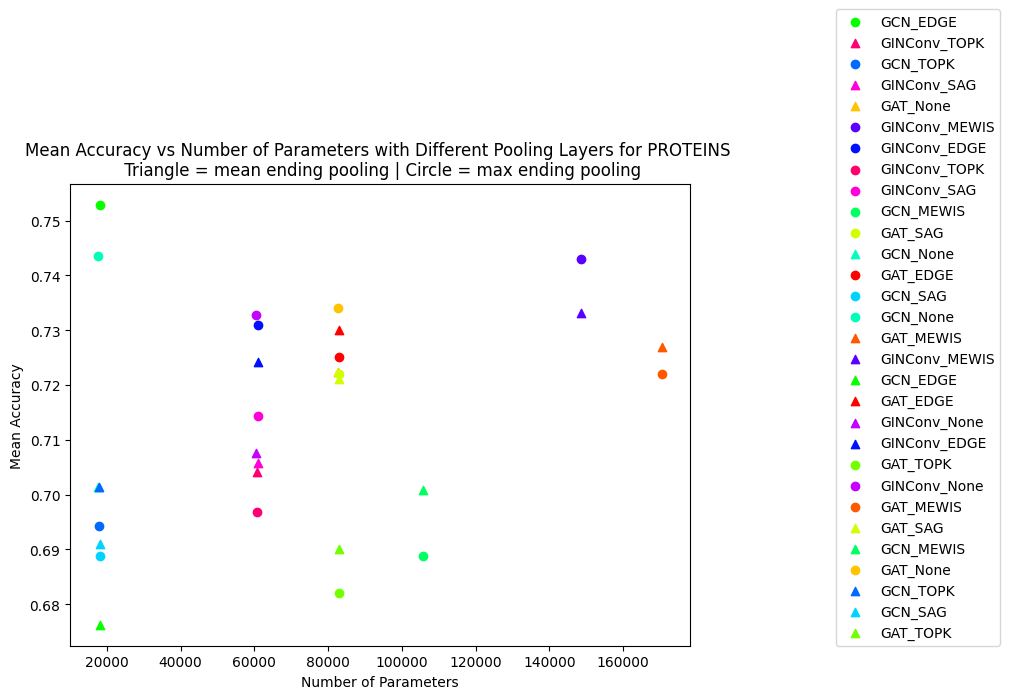

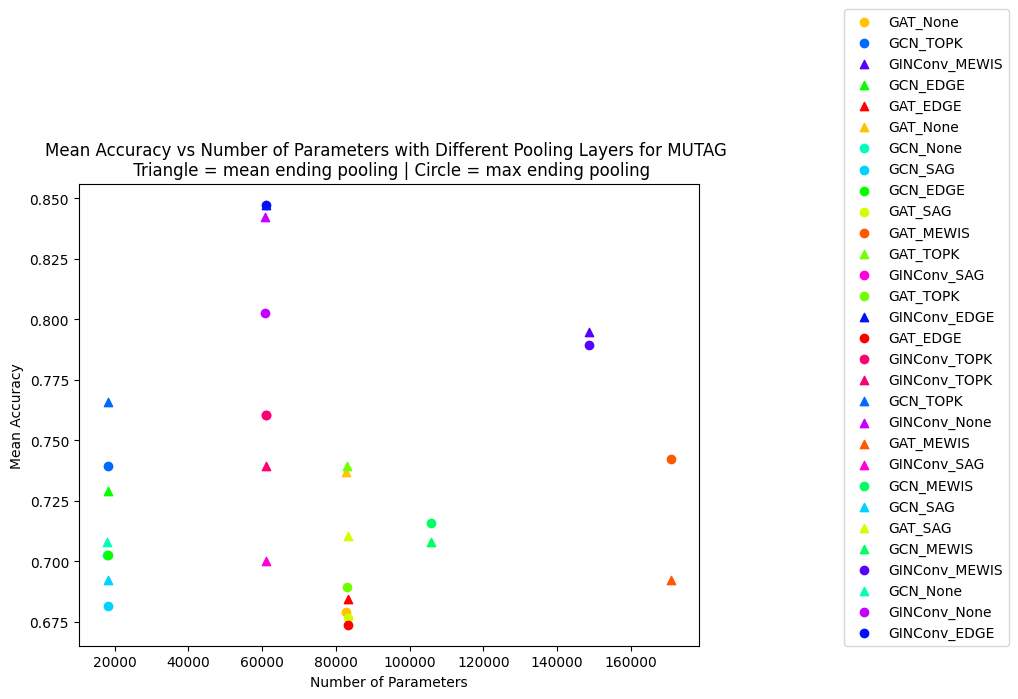

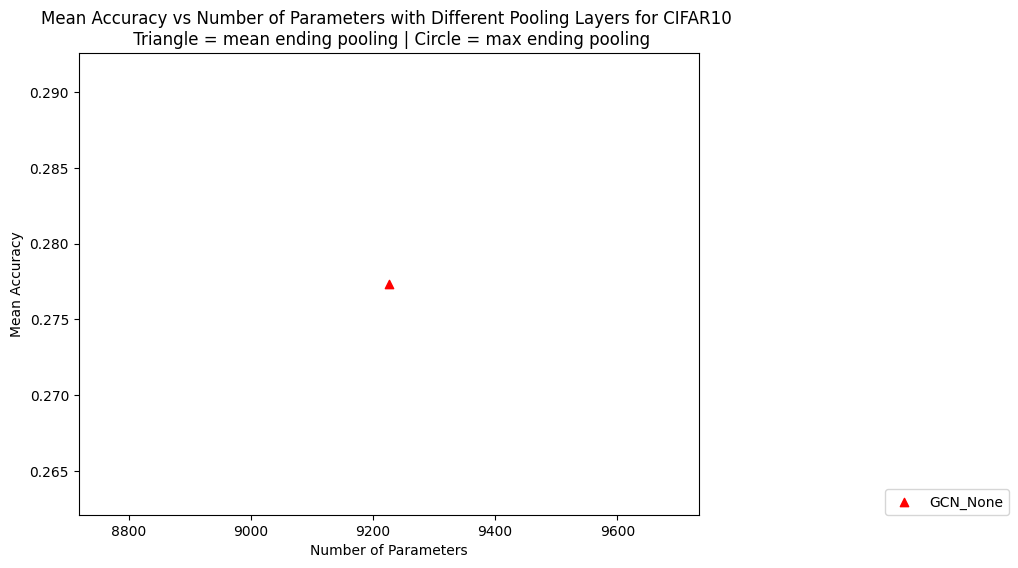

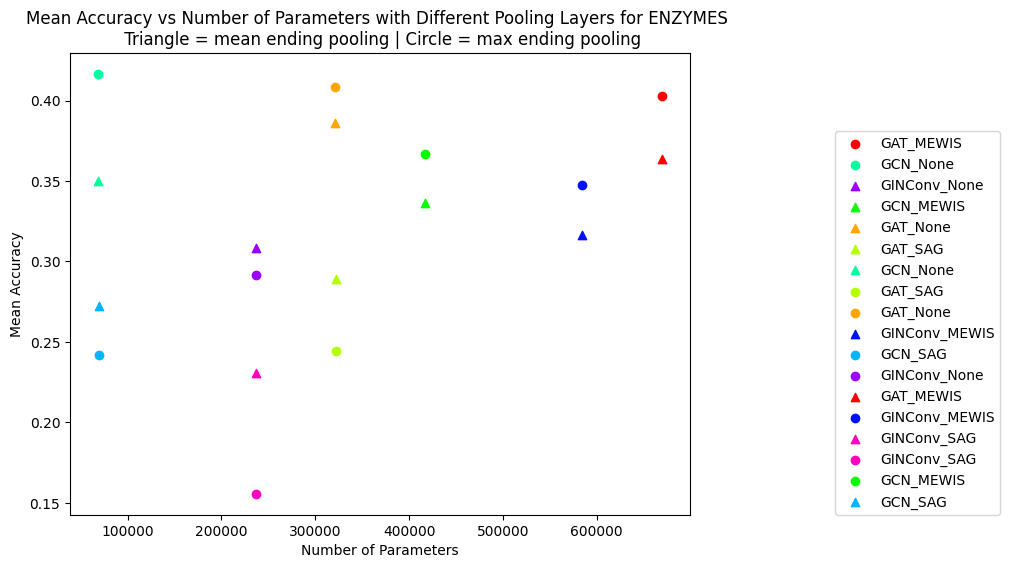

In [9]:
plot_acc_parameters(list_dict)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


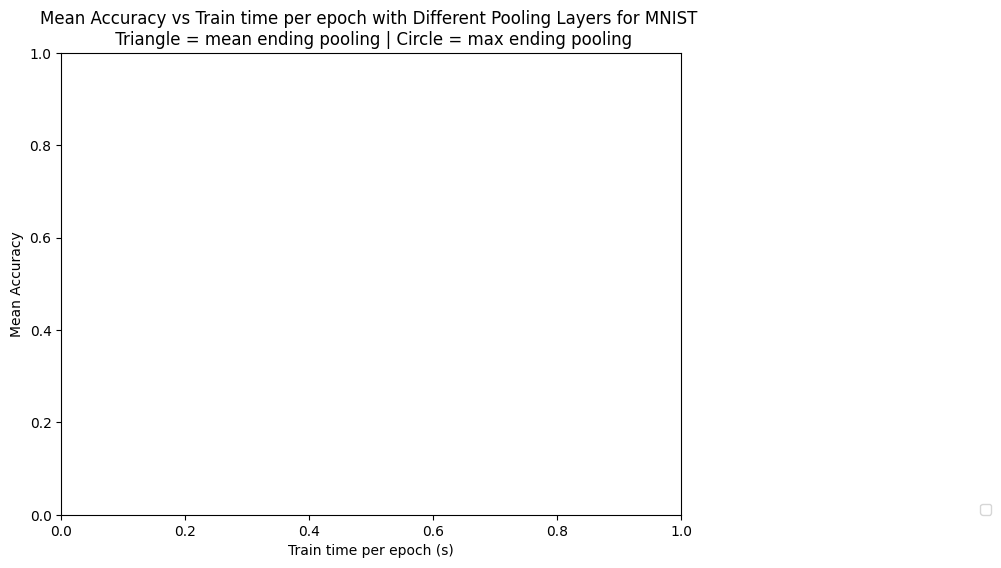

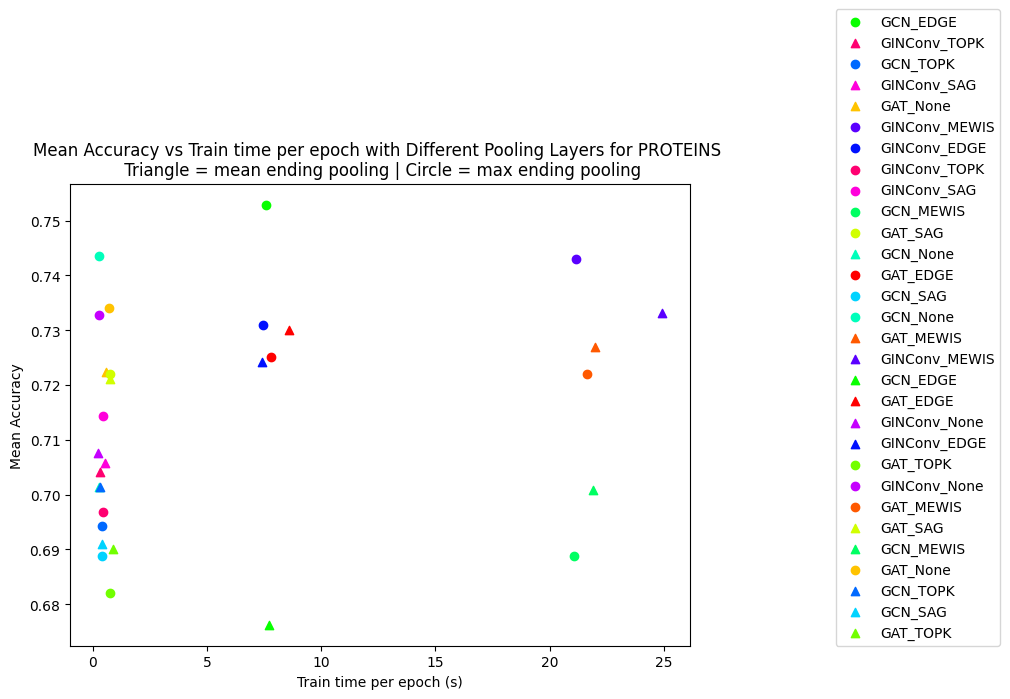

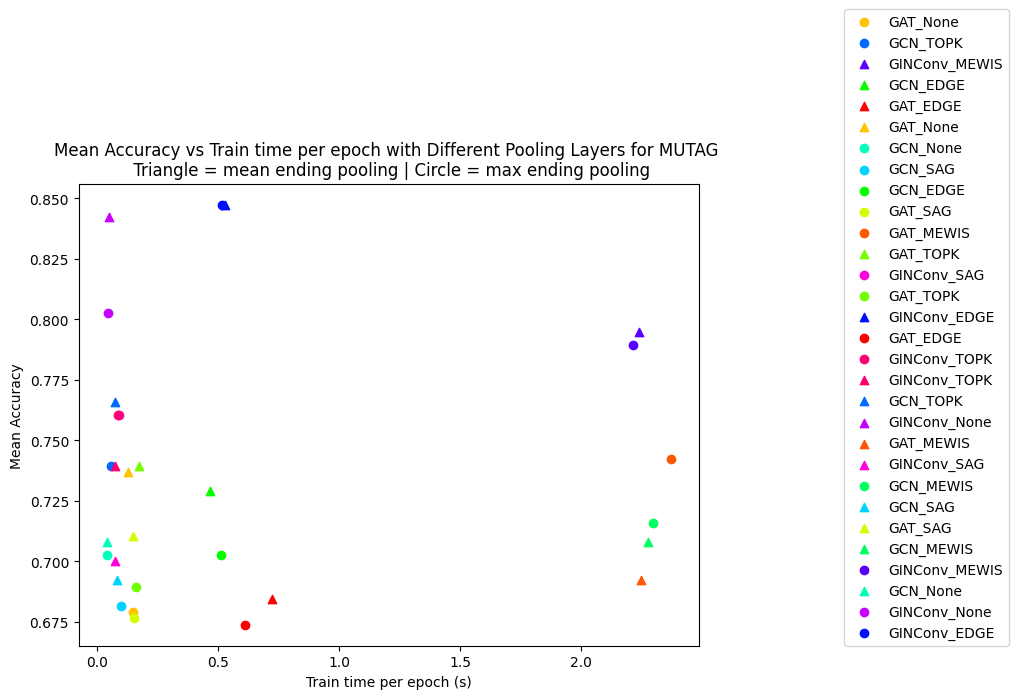

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


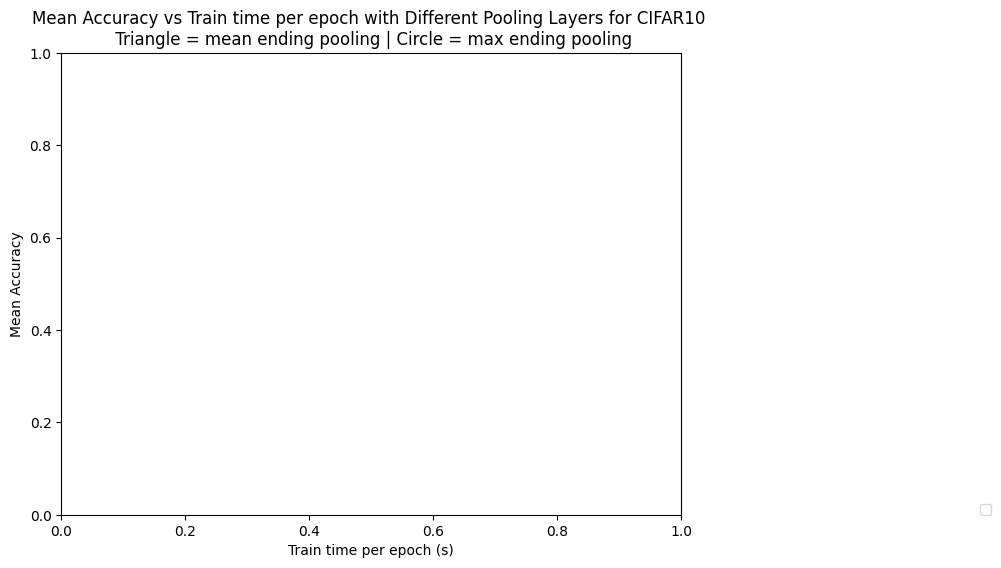

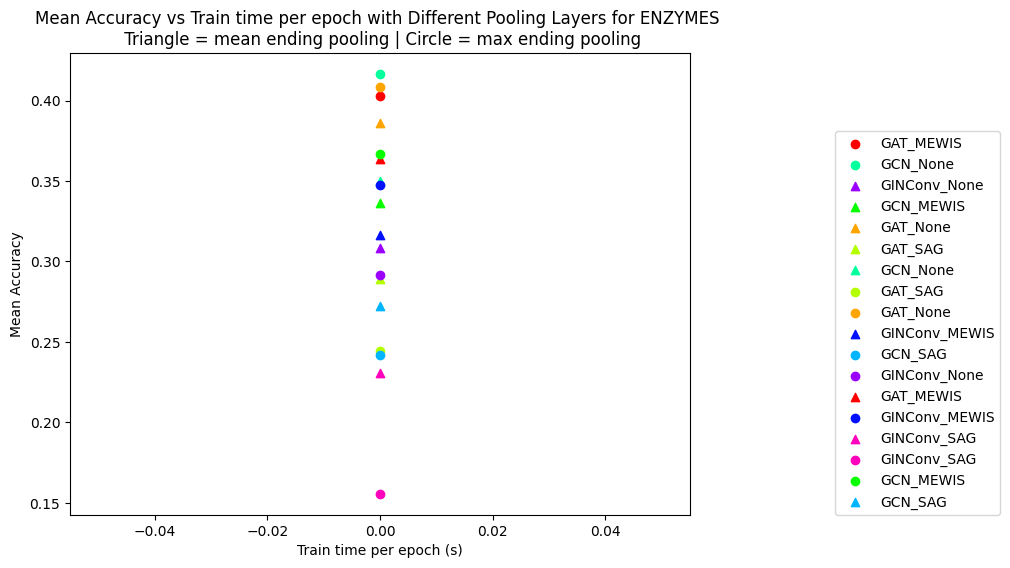

In [10]:
plot_acc_time_epoch(list_dict)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


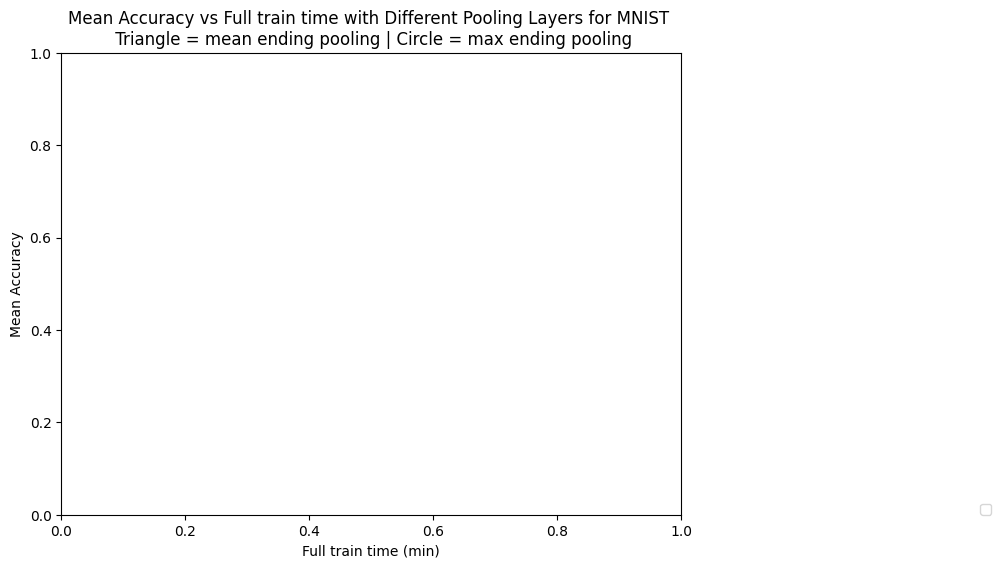

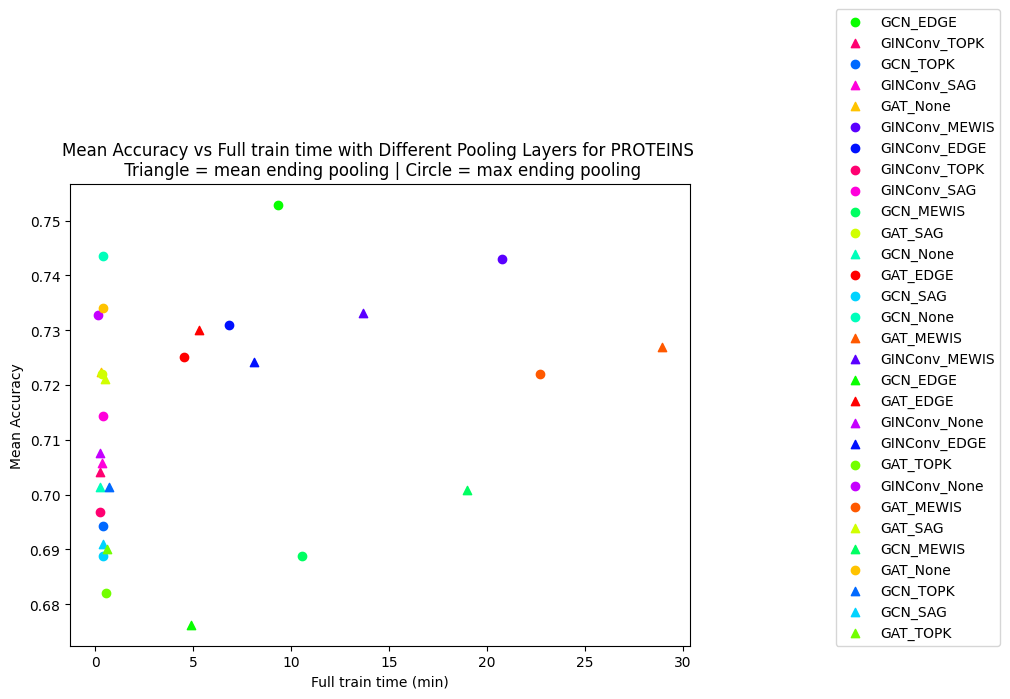

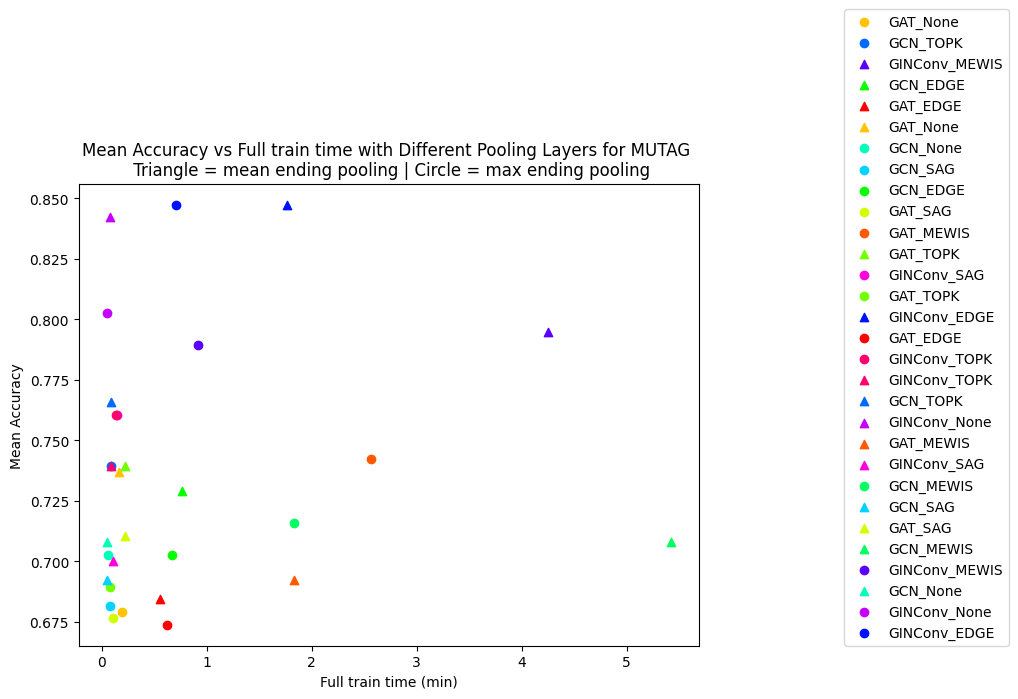

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


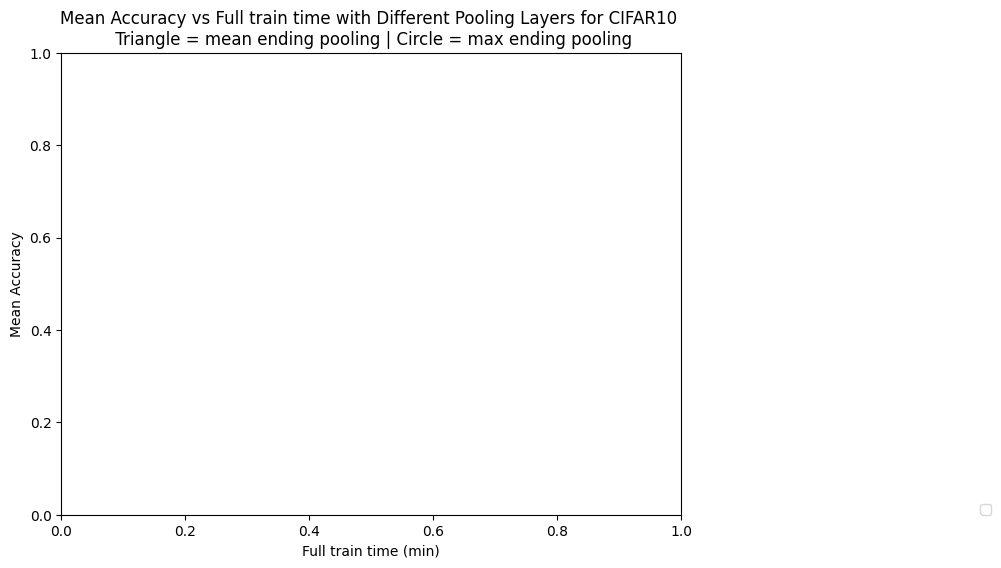

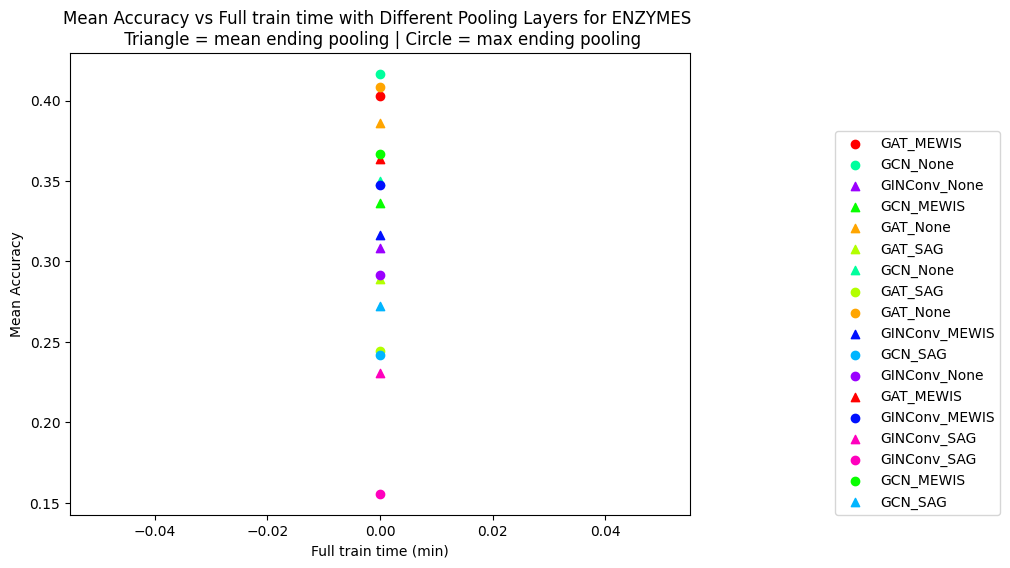

In [11]:
plot_acc_full_train_time(list_dict)